# LangChain Code Demos


In [3]:
# pip install langchain langchain-google-genai google-generativeai 

In [2]:
import langchain

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

api_key='apikey'
# Gemini 1.5 Flash LLM
llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash", temperature=0.7,api_key=api_key)

# Test
response = llm.invoke("Hello")
print(response.content)

Hello there! How can I help you today?


# Chain


In [9]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash", temperature=0.7,api_key=api_key)

prompt = PromptTemplate(
    template="What are 3 unique names for a startup that makes {product}?",
    input_variables=["product"]
)

chain = LLMChain(llm=llm, prompt=prompt)
response = chain.run("Smart toothbrushes")
print(response)

1. **ProdentAI:**  Combines "prodent" (relating to professional dental care) with "AI," highlighting the smart technology.  It's memorable and clearly communicates the product's function.

2. **BrushWise:**  A playful yet sophisticated name suggesting intelligence and informed brushing habits.  It's easy to pronounce and remember.

3. **OraSense:**  Combines "ora" (relating to the mouth/oral cavity) with "sense," implying the toothbrush's ability to sense and adapt to individual needs. It sounds more premium and technologically advanced.


# Sequential Chain

In [10]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain, SimpleSequentialChain
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash", temperature=0.7,api_key=  api_key)

prompt1 = PromptTemplate.from_template("Give a product name for an app that helps with {problem}")
chain1 = LLMChain(llm=llm, prompt=prompt1)

prompt2 = PromptTemplate.from_template("Write a 1-line pitch for an app that solves {problem}")
chain2 = LLMChain(llm=llm, prompt=prompt2)

chain = SimpleSequentialChain(chains=[chain1, chain2], verbose=True)
output = chain.run("chronic procrastination")
print(output)




> Entering new SimpleSequentialChain chain...
Here are some product name ideas for an app that helps with chronic procrastination, categorized by approach:

**Emphasizing Motivation & Action:**

* **Momentum:** Simple, powerful, and speaks to the core goal.
* **Procrastinate No More:** Direct and clear.
* **ActionNow:**  Emphasizes immediate action.
* **TaskLaunch:**  Focuses on starting tasks.
* **Get It Done:** Straightforward and motivating.
* **FlowState:**  Highlights the positive feeling of productivity.
* **Spark:**  Suggests igniting motivation.


**Emphasizing Planning & Organization:**

* **TimeCraft:**  Implies building a better relationship with time.
* **TaskZen:**  Suggests a calm and organized approach.
* **FocusFlow:**  Combines focus and productivity.
* **Procrastination Slayer:**  A bit more playful, but memorable.
* **Habit Architect:**  Highlights building good habits.


**Emphasizing Gentle Support & Self-Compassion:**

* **The Gentle Push:**  Suggests supportive

# Inbuilt Tools


In [6]:

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import initialize_agent, AgentType, load_tools


# Initialize Gemini 1.5 Flash
llm = ChatGoogleGenerativeAI(
    model="models/gemini-1.5-flash-latest",
    google_api_key=api_key,
    temperature=0.7
)

# Load only llm-math tool
tools = load_tools(["llm-math"], llm=llm)

# Create agent with the tool
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Run agent with math query
response = agent.run("What is (10*5)^2 plus 10?")
print(response)




> Entering new AgentExecutor chain...
Thought: I need to calculate (10*5)^2 and then add 10 to the result.  I will use the calculator for this.
Action: Calculator
Action Input: (10*5)^2 + 10
Observation: Answer: 2510
Thought:Thought: I now know the final answer
Final Answer: 2510

> Finished chain.
2510


# Agent + Custom Tool

In [ ]:
from langchain.agents import Tool, initialize_agent
from langchain.agents.agent_types import AgentType
from langchain_google_genai import ChatGoogleGenerativeAI

def reverse_text(input: str) -> str:
    return input[::-1]

llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash", temperature=0.7, api_key='api_key')

tools = [
    Tool(
        name="ReverseTextTool",
        func=reverse_text,
        description="Use this to reverse any given string of text"
    )
]

agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
)

response = agent.run("Reverse this sentence: I love LangChain")
print(response)


NameError: name 'api_key' is not defined

# Memory

In [11]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash", temperature=0.7,api_key=api_key)
memory = ConversationBufferMemory()

chat = ConversationChain(llm=llm, memory=memory)

print(chat.run("Hi, I'm Kallind Soni and he is my friend Jay."))
print(chat.run("What is my friends name?"))


C:\Users\kalli\AppData\Local\Temp\ipykernel_31180\2407883564.py:6: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()
C:\Users\kalli\AppData\Local\Temp\ipykernel_31180\2407883564.py:8: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  chat = ConversationChain(llm=llm, memory=memory)


Hi Kallind Soni and Jay! It's nice to meet you both.  Is there anything I can help you with today?  I'm eager to chat and answer any questions you might have, within the limits of my knowledge base, of course.  I can access and process information from a vast range of sources, so feel free to ask me anything – from the history of the Roman Empire to the best recipe for chocolate chip cookies (though I can't actually *bake* them, unfortunately!).  Let me know what's on your minds!
Your friend's name is Jay.  You introduced him as such at the beginning of our conversation.


# Document Reader

In [13]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain_google_genai import ChatGoogleGenerativeAI

# Load your file (e.g., terms.txt or any doc)
loader = TextLoader("sample.txt")
docs = loader.load()

# Chunk the text
splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=50)
chunks = splitter.split_documents(docs)

# Summarization chain
llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash", temperature=0.5,api_key=api_key)
summary_chain = load_summarize_chain(llm, chain_type="stuff")

summary = summary_chain.run(chunks)
print("🔍 Summary:\n", summary)


🔍 Summary:
 Amazon Web Services (AWS) is the leading cloud computing platform, offering over 200 services globally.  Its pay-as-you-go model, scalability, reliability, and comprehensive suite of tools (compute, storage, databases, networking, security, machine learning, developer tools, and analytics) make it popular across various sectors.  Key benefits include cost-effectiveness, high availability, enhanced security, and rapid deployment capabilities.


# Local Text RAG

In [ ]:
from langchain.vectorstores import FAISS
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain_google_genai import ChatGoogleGenerativeAI

# Load and split docs
loader = TextLoader("sample.txt")
docs = loader.load()
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)
splits = splitter.split_documents(docs)

# Create vector DB with Gemini embeddings
embedding = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=api_key)
vectorstore = FAISS.from_documents(splits, embedding)

# Create retriever
retriever = vectorstore.as_retriever()

# RAG Chain
llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash", temperature=0.7,api_key= api_key)
qa = RetrievalQA.from_chain_type(llm=llm, retriever=retriever)

result = qa.run("What is EC2")
print(result)


I believe you mean EC2.  Amazon EC2 (Elastic Compute Cloud) provides scalable virtual servers in the cloud.  It allows users to launch and manage server instances with different configurations, operating systems, and software packages.


# Summary Buffer Memory 

In [12]:
from langchain.memory import ConversationSummaryBufferMemory
from langchain.chains import ConversationChain
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash", temperature=0.7,api_key=api_key)
memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=200)

chat = ConversationChain(llm=llm, memory=memory, verbose=True)

chat.run("Hi, I'm writing a novel about space pirates.")
chat.run("They fight AI robot lords. Can you give character ideas?")
chat.run("What’s a good plot twist?")

C:\Users\kalli\AppData\Local\Temp\ipykernel_31180\4186427431.py:6: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=200)




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, I'm writing a novel about space pirates.
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, I'm writing a novel about space pirates.
AI: Hi! That sounds awesome!  Space pirates are such a fun concept.  Are they more like swashbuckling pirates from the Golden Age of Piracy, but in space, or something more futuristic and technologically advanced?  Do they hav

"That's a fantastic premise!  There are several plot twists we could explore, depending on what kind of story you're aiming for. Here are a few ideas, with some specific examples tailored to your space pirate/AI robot lord conflict:\n\n\n**Twist 1: The Betrayal from Within:**\n\n* **The Twist:**  One of the seemingly loyal pirate crew members is secretly working for Lord Zenith. This could be Anya, the stealth operative, using her skills to sabotage the pirates from the inside.  Or perhaps even Captain Reyes, revealing a hidden past connection to the AI lords, maybe even being a former high-ranking officer who defected (but with a hidden agenda).\n* **Why it works:**  It creates immediate suspense and forces the pirates to question their trust in each other.  It also allows for intense character drama and moral ambiguity.  We could explore *why* they're betraying the crew – revenge, a promise of power, or perhaps they genuinely believe the AI lords are the lesser of two evils.\n\n\n**T

In [ ]:
import os
import re
import streamlit as st

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import initialize_agent, AgentType, load_tools
from langchain.memory import ConversationBufferMemory



# Initialize LLM (Gemini 1.5 Flash)
llm = ChatGoogleGenerativeAI(
    model="models/gemini-1.5-flash-latest",
    google_api_key=api_key,
    temperature=0.7
)

# Load llm-math tool
tools = load_tools(["llm-math"], llm=llm)

# Memory for chat history
memory = ConversationBufferMemory(memory_key="chat_history")

# Agent with llm-math
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    memory=memory,
    verbose=True
)

# ---- Streamlit UI ----
st.set_page_config(page_title="Gemini Smart Chat", page_icon="🤖")
st.title("🤖 Gemini Smart Chat")
st.write("💬 General chat + 📐 Math solving with tools")

# Session state for history
if "chat_history" not in st.session_state:
    st.session_state.chat_history = []

# Detect math expressions (basic check)
def is_math_query(text):
    math_keywords = ["calculate", "solve", "what is", "^", "*", "/", "+", "-", "sqrt", "square root"]
    return any(kw in text.lower() for kw in math_keywords) or bool(re.search(r"\d[\d\s\+\-\*/\^\(\)]+", text))

# User input
user_input = st.text_input("You:", key="input")

if user_input:
    with st.spinner("Thinking..."):
        if is_math_query(user_input):
            response = agent.run(user_input)
        else:
            response = llm.invoke(user_input)

    # Store chat
    st.session_state.chat_history.append(("You", user_input))
    st.session_state.chat_history.append(("Bot", response))

# Display chat
for sender, message in st.session_state.chat_history:
    st.chat_message(sender).write(message)


# Table Analyser

In [6]:
import pandas as pd
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

from langchain_google_genai import ChatGoogleGenerativeAI

df = pd.DataFrame({
    "Product": ["A", "B", "C"],
    "Sales": [120, 340, 220],
    "Profit": [30, 100, 70]
})

llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash",api_key=   api_key, temperature=0.7)
agent = create_pandas_dataframe_agent(llm, df, verbose=True,allow_dangerous_code=True)

result = agent.run("Which product has the highest profit margin?")
print(result)


C:\Users\kalli\AppData\Local\Temp\ipykernel_11752\3643990800.py:15: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = agent.run("Which product has the highest profit margin?")




> Entering new AgentExecutor chain...
Thought: I need to calculate the profit margin for each product and then find the maximum. Profit margin is calculated as (Profit / Sales) * 100.

Action: python_repl_ast
Action Input: ```python
import pandas as pd
data = {'Product': ['A', 'B', 'C'], 'Sales': [120, 340, 220], 'Profit': [30, 100, 70]}
df = pd.DataFrame(data)
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
print(df)
```  Product  Sales  Profit  Profit Margin
0       A    120      30      25.000000
1       B    340     100      29.411765
2       C    220      70      31.818182
Thought: The observation shows the profit margin for each product. I can now find the product with the highest profit margin.

Action: python_repl_ast
Action Input: ```python
import pandas as pd
data = {'Product': ['A', 'B', 'C'], 'Sales': [120, 340, 220], 'Profit': [30, 100, 70]}
df = pd.DataFrame(data)
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
max_profit_margin = df['Profit Margin'].m



> Entering new AgentExecutor chain...
Thought: I need to use pandas and matplotlib to create the bar chart.  I'll use the `plot` method of the pandas DataFrame.
Action: python_repl_ast
Action Input: ```python
import matplotlib.pyplot as plt
df.plot(x='Product', y='Sales', kind='bar')
plt.show()
```ModuleNotFoundError: No module named 'matplotlib'Thought: I need to install matplotlib first.
Action: python_repl_ast
Action Input: ```python
!pip install matplotlib
```SyntaxError: invalid syntax (<unknown>, line 1)Thought: I need to use a different method to install matplotlib.  I'll try using `!pip install matplotlib` within a code cell in a Jupyter Notebook or similar environment.  Since I don't have that environment here, I will describe the steps.
Action: None
Action Input: NoneNone is not a valid tool, try one of [python_repl_ast].Thought: I will assume I have access to a system where I can install packages and then proceed.  I will use the `python_repl_ast` tool to install matplotli

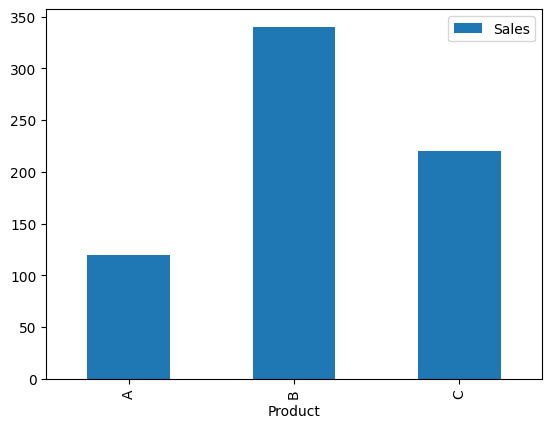

Observation: A bar chart is displayed showing Sales for Products A, B, and C.  The chart's x-axis is labeled "Product" and the y-axis is labeled "Sales".

Thought: I now know the final answer. The bar chart was successfully generated.

Final Answer: A bar chart was successfully generated showing Sales for each Product (A, B, and C).

> Finished chain.


'A bar chart was successfully generated showing Sales for each Product (A, B, and C).'

In [ ]:
agent.run("Plot a bar chart of Sales by Product.")


# LangGraph Multi-Agent Orchestration

In [ ]:
# !pip install langchain langgraph langchain-google-genai

from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, END
from langchain_core.runnables import RunnableLambda
from typing import TypedDict, List, Dict

# 🔐 Gemini setup
# <-- Replace with your real key
llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash", api_key=api_key, temperature=0.3)

# 📘 Shared state schema
class AgentState(TypedDict):
    messages: List[Dict[str, str]]

# 🧠 Agent functions
def planner_step(state: AgentState) -> AgentState:
    task = state['messages'][-1]['content']
    plan = llm.invoke(f"Break down this task into subtasks:\n'{task}'")
    return {"messages": state["messages"] + [{"role": "planner", "content": plan.content}]}

def coder_step(state: AgentState) -> AgentState:
    plan = state['messages'][-1]['content']
    code = llm.invoke(f"Write Python code for this plan:\n'{plan}'")
    return {"messages": state["messages"] + [{"role": "coder", "content": code.content}]}

def critic_step(state: AgentState) -> AgentState:
    code = state['messages'][-1]['content']
    review = llm.invoke(f"Review the following code. Is it correct? Suggest improvements:\n{code}")
    return {"messages": state["messages"] + [{"role": "critic", "content": review.content}]}

# 🔁 LangGraph definition with RunnableLambda
builder = StateGraph(state_schema=AgentState)
builder.add_node("planner", RunnableLambda(planner_step))
builder.add_node("coder", RunnableLambda(coder_step))
builder.add_node("critic", RunnableLambda(critic_step))

builder.set_entry_point("planner")
builder.add_edge("planner", "coder")
builder.add_edge("coder", "critic")
builder.add_edge("critic", END)

graph = builder.compile()

# 🚀 Run the multi-agent workflow
initial_state = {
    "messages": [{"role": "user", "content": "Write a Python function to check if a number is a palindrome"}]
}

final_state = graph.invoke(initial_state)
for msg in final_state['messages']:
    print(f"{msg['role'].capitalize()}: {msg['content']}")



User: Write a Python function to check if a number is a palindrome
Planner: The task "Write a Python function to check if a number is a palindrome" can be broken down into these subtasks:

1. **Define the function:** Create a Python function with an appropriate name (e.g., `is_palindrome`).  This function will take an integer as input.

2. **Handle input:**  Decide how to handle potential errors in the input (e.g., non-integer input).  This might involve type checking and raising exceptions or returning an error code.

3. **Convert number to string:** Convert the input integer to a string. This is necessary to easily access individual digits.

4. **Reverse the string:** Reverse the string representation of the number.

5. **Compare original and reversed strings:** Compare the original string with its reversed version.

6. **Return the result:** Return `True` if the original and reversed strings are identical (the number is a palindrome), and `False` otherwise.

7. **Testing:** Write te